Click the y-axis, or anywhere on the chart, to change the sample size selector


<IPython.core.display.Javascript object>


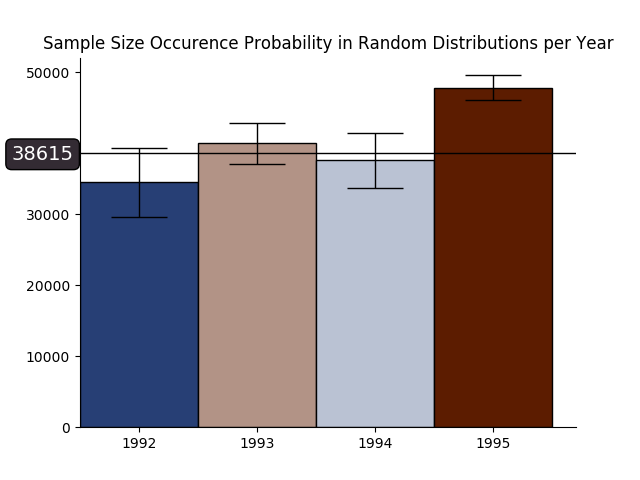

In [2]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
@brief Given Data
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
@Summary Extra imports, and admin tasks
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

import scipy
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from IPython import display

original_data_dt = df.copy()

#Add %matplotlib notebook to allow Jupyter Notebooks to have interavtivity
%matplotlib notebook

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
@summary Helper Function Definitions
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""
@brief Get user input, and ensure it is a number
"""
def GetUserInput():   
    # Try getting and converting input to number.  This function was used mostly
    # for the easy and hard variants of this project, where typed user input was required
    try:
        input_val = int(input('Input y-value: '))
    except ValueError:
        print('The value input is not a number, please rerun the program')
        return False
    return input_val

"""
@brief calculates the confidence interval of a given data set
@param data the iterable data set
@param c the confidence level desired
"""
def GetConfIntervals(data,c=0.95):
    arr = 1.0*np.array(data)
    count=len(arr)
    mean = np.mean(arr)
    st_err = scipy.stats.sem(arr)
    h = st_err*scipy.stats.t.ppf((1+c)/2.0,count-1)
    
    err_low = mean - h
    err_high = mean + h
    
    return mean,err_low,err_high

"""
@brief sets the color of a single bar on a bar chart

@param bar_item a single bar item from a plt.bar chart
@param height_val the height that the bar will change the color wrt
"""
def SetBarColor(bar_item,height_val, mean_val, err_low, err_high):
        
    # Sets the darkest color value for each color
    r_min = 0.359
    g_min = 0.109
    b_min = 0.359
    
    # Get the scaling function slope for each color.  color_ratio = [0,1], which is the y-axis value
    r_slope = -(1-0)/(r_min-1)
    g_slope = -(1-0)/(g_min-1)
    b_slope = -(1-0)/(b_min-1)
    
    # If y value is above the bar_height, only change the red color
    if (height_val < mean_val):
        #Determine the amount of red to apply by the height below the mean.  If the
        #scaling ratio is more than 1, set red to 1
        color_ratio = min([(mean_val-height_val)/(mean_val-err_low),1])  
        #bar_item.set_color((color_ratio,0,0,0.5*color_ratio))     
        r=(1-color_ratio)/r_slope + r_min
        g=(1-color_ratio)/g_slope + g_min
        b=1-color_ratio
        a=1        
    # If y value is above the bar height only change the blue color
    elif (height_val > mean_val):
        #Determine the amount of blue to apply by the height above the mean             
        color_ratio = min([(height_val-mean_val)/(err_high - mean_val),1])
        #bar_item.set_color((0,0,color_ratio,0.5*color_ratio))
        r=1-color_ratio
        g=(1-color_ratio)/g_slope + g_min
        b=(1-color_ratio)/b_slope + b_min
        a=1        
    # Set the color to white if the bar height is equal to the y value
    elif (height_val == mean_val):
        color_ratio=1
        r=1
        g=1
        b=1
        a=1
    
    bar_item.set_color((r,g,b,a))   
    
    return

"""
@brief Sets the colors of a given set of bars

@param bars the matplotlib bar objects
@param bar_data_df the statistical data used to calculate the colors
@param height_input the user selected height level to calculate
"""
def ChangeBarColors(bars,bar_data_df,height_input):
    for bar_index in [0,1,2,3]:
        mean_val = bar_data_df.loc[0][bar_index]
        err_low = bar_data_df.loc[1][bar_index]
        err_high = bar_data_df.loc[2][bar_index]

        SetBarColor(bars[bar_index],height_input,mean_val, err_low, err_high)
            
    # Add borders around bars
    for bar in bars:
        bar.set_linewidth(1)
        bar.set_edgecolor('k')


"""
@brief Create the textbox of user input

@param axis_obj the axis object from the output of the creation of a plot, traditionally "ax"
@param height_val the user-selected height value to study
"""
def SetTextbox(axis_obj, height_val):    
    # Set the style of the box
    styling = dict(boxstyle='round', facecolor=('.2','.17','.2'), alpha=1)
    
    # Set the text on the box
    text_str = str(height_input)
    
    # Scale the location of the text box via the height selection
    text_y_loc = 1.03 * height_val/ax.get_ylim()[1]
    text_x_loc = -.013
    
    # place the textbox to the right of the height selection line
    text_box = axis_obj.text(text_x_loc, text_y_loc, text_str, transform=axis_obj.transAxes, fontsize=14, color='white',
            verticalalignment='top', horizontalalignment='right',bbox=styling)
    
    return text_box


class Heightbox:    
    def __init__(self):
        self.height_value = 0
        
    def SetHeight(self, height_value):
        self.height_value = height_value
    
    """
    @brief Create the textbox of user input

    @param axis_obj the axis object from the output of the creation of a plot, traditionally "ax"
    """
    def SetTextbox(self, axis_obj):    
        # Set the style of the box
        styling = dict(boxstyle='round', facecolor=(.2,.17,.2), alpha=1)

        # Set the text on the box
        text_str = str(int(self.height_value))

        # Scale the location of the text box via the height selection
        text_y_loc = 1.03 * self.height_value/ax.get_ylim()[1]
        text_x_loc = -.013

        # place the textbox to the right of the height selection line
        self.text_box = axis_obj.text(text_x_loc, text_y_loc, text_str, transform=axis_obj.transAxes, fontsize=14, color='white',
                verticalalignment='top', horizontalalignment='right',bbox=styling)

        #return text_box
    
    """
    @brief Remove the textbox that was created
    """
    def RemoveTextbox(self):
        self.text_box.remove()
    
    """
    @brief Create a horizontal marker line at the chosen height value on the graph
    
    @param plt The plot object where the horizontal line was created
    """
    def SetHLine(self,plt):
        self.h_line = plt.axhline(y=self.height_value,xmin=-100,xmax=1996,linewidth=1,color='k')
    
    """
    @brief Remove the horizontal line marker
    """
    def RemoveHLine(self):
        self.h_line.remove()

        
        
"""
@brief Set the mouse button click event function for setting the height value from a user
"""
def on_click(event):
    #Create transform of data to get data space values
    
    # House a dummy x variable that is equal to somewhere in the graph in x_coords, so that we can convert the
    # y-axis value on the axis to a data location when the user clicks on the y-axis.  Otherwise, the x-axis value
    # will be none, and no data can be found
    dummy_x = ax.transAxes.transform((0.5,0))[0]
    dummy_x = ax.transData.inverted().transform((dummy_x,0))[0] #Get data in Data space
    
    # Get the y-height in data space
    y_data_space = ax.transData.inverted().transform((dummy_x,event.y))[1]
    
    #plt.gca().set_title('Height Value: {}'.format(y_data_space))
    height_input = y_data_space
    
    #Reset the bar colors
    ChangeBarColors(bars,bar_data_df,height_input)
    
    # Remove the previous value's textbox and marker line
    height_text.RemoveTextbox()
    height_text.RemoveHLine()
    
    # Add textbox with the new height input
    height_text.SetHeight(height_input)
    height_text.SetTextbox(ax)
    height_text.SetHLine(plt)     

    #plt.draw()
    #plt.show()

    
    
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
@summary main code
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


"""
@brief Get user input
"""
print("Click the y-axis, or anywhere on the chart, to change the sample size selector")
# Create an initial height value to look at
height_input = 38000

"""
@brief Get the values to create the bars and error bars
"""
# Create a barchart of the average values.  Use the y-error bars to show the minimum and maximum possible values
# Get the average values to use as the bar heights
height_vals = df.mean(axis=1)


# Calculate the y-error lines by using the confidence intervals (Defaults to 95% confidence)
bar_data_df = pd.DataFrame()  #Houses the data used to change the color of the graphs
mean_vals = []
err_bar_vals = []
for year in df.index.values:
    err_bar_vals.append((GetConfIntervals(df.loc[year])[2] - GetConfIntervals(df.loc[year])[1])/2)
    bar_data_df[str(year)] = [GetConfIntervals(df.loc[year])[0],GetConfIntervals(df.loc[year])[1],GetConfIntervals(df.loc[year])[2]]

"""
@brief create the basic plots and set error bars
"""
# Create the bars as the average value of the data, add y error with yerr= parameter
fig, ax = plt.subplots()

# Add error bars and caps
error_kw = {'capsize': 20, 'capthick': 1, 'ecolor': 'black', 'elinewidth':1, 'elinecolor':'black'}  # Error bar arguments
bars = plt.bar(df.index.values,height_vals,width=1.0,yerr=err_bar_vals, error_kw=error_kw, align='center')


"""
@brief Change colors of the bars
"""    
# Set colors based on y-axis value selection: the color is white if the bar is at the average.                  
ChangeBarColors(bars,bar_data_df,height_input)

"""
@brief cleanup the charts, add title, add labels, etc
"""
# Fix the x-axis scale: decimal values to integers, multiple tick labels of the same value 
plt.locator_params(axis='x',nbins=5)    
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlim([1991.5,1995.7])

# Add title
plt.title('Sample Size Occurence Probability in Random Distributions per Year')

# FIXME: Add x-axis label
#plt.xlabel('Years')

# FIXME: Add y-axis label
#plt.ylabel('Population')

# Remove chart junk
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)   

# Add textbox of input height
height_text = Heightbox()
height_text.SetHeight(height_input)
height_text.SetTextbox(ax)
height_text.SetHLine(plt)
plt.show()

# Create event to allow user to select the y-axis value
cid = plt.gcf().canvas.mpl_connect('button_press_event',on_click)